# Project 3 - 고양이 수염 스티커 만들기

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

### (1) 얼굴 이미지 불러오기

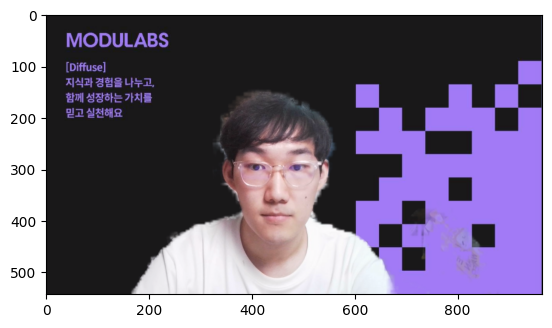

In [5]:
my_image_path = './data/images/my_front.png'

img_bgr = cv2.imread(my_image_path, 1)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

### (2) 얼굴 검출하기

In [6]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기

In [7]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(366, 242) (551, 428)]]


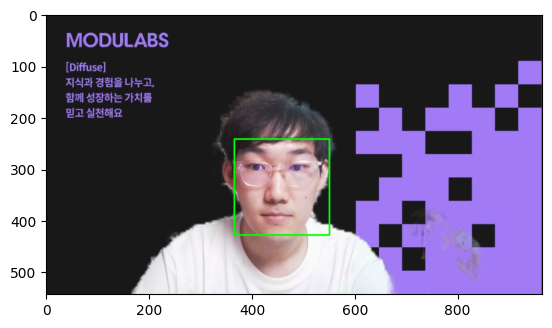

In [8]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    # 왼쪽 위 좌표와 오른쪽 아래 좌표 사이 직각 사각형
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### (3) 랜드마크 검출하기

In [9]:
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# 다운로드 하여 './data/models/shape_predictor_68_face_landmarks.dat' 생성
model_path = './data/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path) # 랜드마크 위치 검출기

In [10]:
list_landmarks = [] # 랜드마크 위치 list

for dlib_rect in dlib_rects: # 얼굴 영역 박스 별 face landmark
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0])) # list_landmarks의 원소는 1개

68


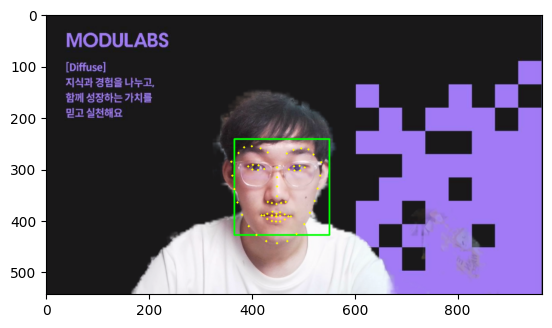

In [11]:
for landmark in list_landmarks: # 얼굴 영역 박스 별 face landmark
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### (4) 스티커 위치 정하기

In [12]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = (landmark[30][1] + landmark[51][1]) // 2 # 이미지에서 코 부위의 y값과 코 끝 부위의 y값의 중간값
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(449, 353)
(x,y) : (449,370)
(w,h) : (186,186)


(186, 186, 3)


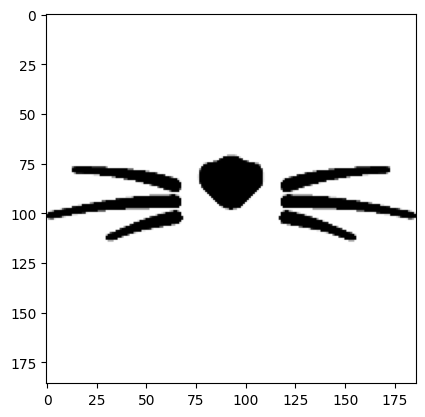

In [13]:
sticker_path = './data/images/cat_whiskers.png' # 스티커 이미지 경로
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정

print (img_sticker.shape)
plt.imshow(img_sticker)

In [14]:
refined_x = x - w // 2
refined_y = y - h // 2
# 이미지 시작점은 top-left 좌표이므로 스티커를 붙이기 위한 x, y 재설정

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (356,277)


In [15]:
# 스티커 이미지가 얼굴 이미지 밖에서 시작하지 않도록 조정이 필요함
# 음수값 만큼 스티커 이미지를 자른다.
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (356,277)


### (5) 스티커 붙이기

In [16]:
# 스티커의 영역 정하기
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 스티커 영역 중, 스티커에 해당하지 않는 부분은 얼굴 이미지로, 나머지는 스티커로 설정한다.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,cv2.addWeighted(sticker_area, 0.3, img_sticker, 0.7, 0)).astype(np.uint8)

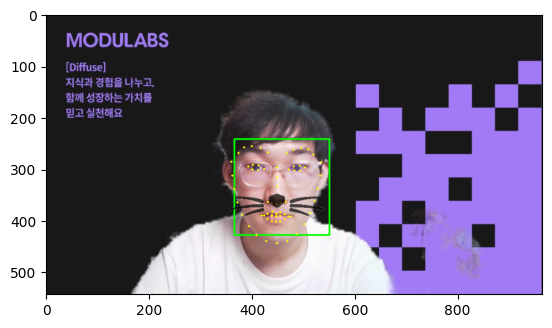

In [17]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

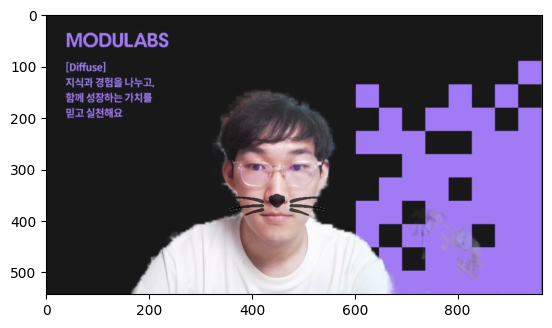

In [18]:
# 최종 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,cv2.addWeighted(sticker_area, 0.3, img_sticker, 0.7, 0)).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 번외 (1) 돌아간 이미지에 적용해보기

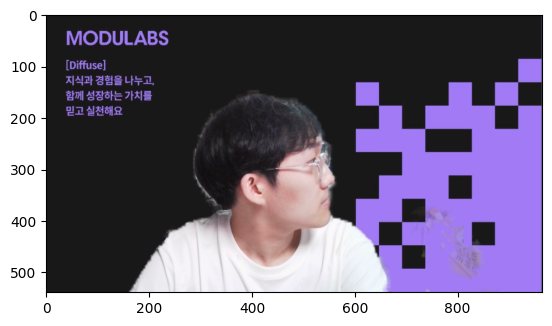

In [19]:
my_image_path = './data/images/my_side.png'

img_bgr = cv2.imread(my_image_path, 1)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

In [20]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기

In [21]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[]


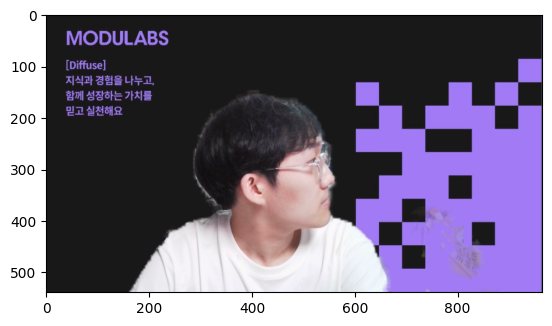

In [22]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    # 왼쪽 위 좌표와 오른쪽 아래 좌표 사이 직각 사각형
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 옆 모습 이미지에서는 얼굴을 제대로 검출하지 못한다.

---

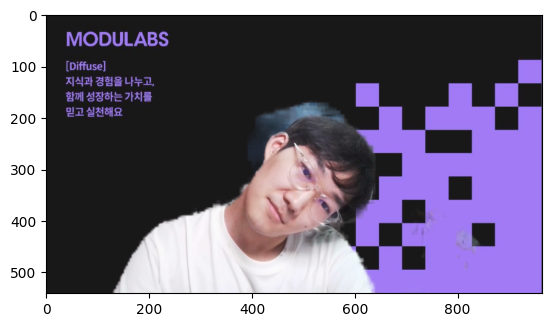

In [23]:
my_image_path = './data/images/my_lie.png'

img_bgr = cv2.imread(my_image_path, 1)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

In [24]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기

In [25]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[]


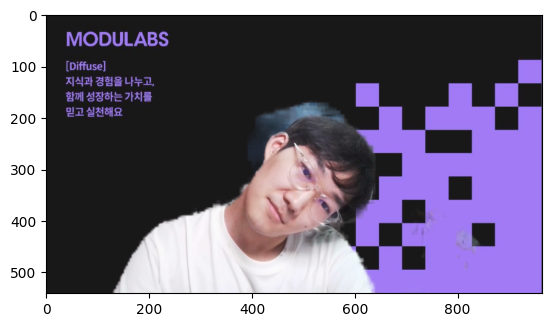

In [26]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    # 왼쪽 위 좌표와 오른쪽 아래 좌표 사이 직각 사각형
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 기울어진 모습 이미지에서 역시 얼굴을 제대로 검출하지 못한다.

### 번외 (2) 문제점 찾아보기

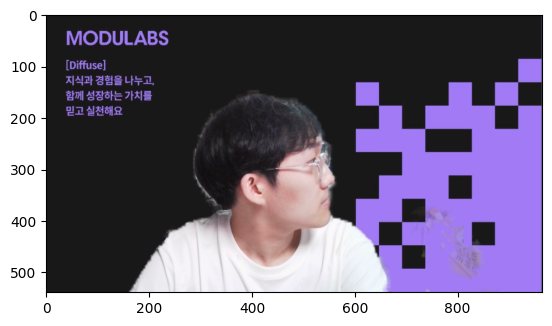

In [27]:
my_image_path = './data/images/my_side.png'

img_bgr = cv2.imread(my_image_path, 1)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

In [29]:
# http://dlib.net/files/mmod_human_face_detector.dat.bz2
# 다운로드 하여 './data/models/mmod_human_face_detector.dat' 생성
detector_cnn = dlib.cnn_face_detection_model_v1('./data/models/mmod_human_face_detector.dat')

- 딥러닝으로 학습한 모델을 사용해보았다.

In [30]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_cnn(img_rgb, 1)

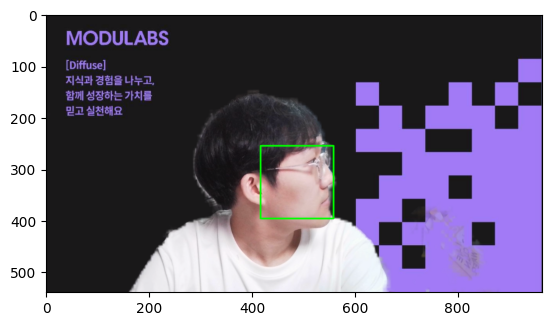

In [31]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.rect.left()
    t = dlib_rect.rect.top()
    r = dlib_rect.rect.right()
    b = dlib_rect.rect.bottom()
    
    # 왼쪽 위 좌표와 오른쪽 아래 좌표 사이 직각 사각형
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 이번에는 박스를 찾았다!

In [32]:
list_landmarks = [] # 랜드마크 위치 list

for dlib_rect in dlib_rects: # 얼굴 영역 박스 별 face landmark
    points = landmark_predictor(img_rgb, dlib_rect.rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0])) # list_landmarks의 원소는 1개

68


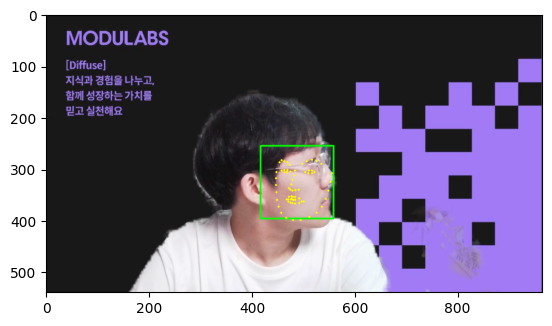

In [33]:
for landmark in list_landmarks: # 얼굴 영역 박스 별 face landmark
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 음...?

-------------------

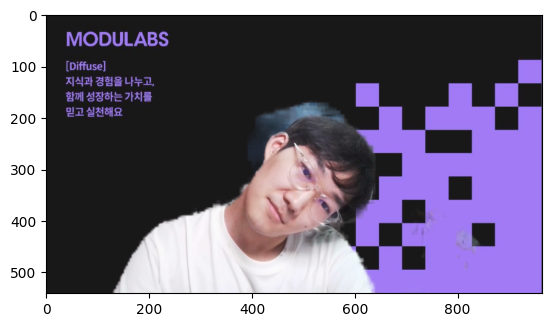

In [34]:
my_image_path = './data/images/my_lie.png'

img_bgr = cv2.imread(my_image_path, 1)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

In [35]:
detector_cnn = dlib.cnn_face_detection_model_v1('./data/models/mmod_human_face_detector.dat')

- 이번에도 역시 딥러닝으로 학습한 모델을 사용해보았다.

In [36]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_cnn(img_rgb, 1)

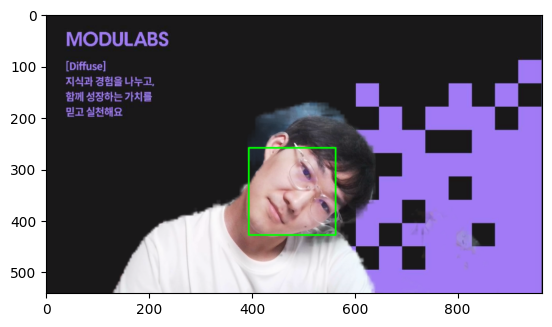

In [37]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.rect.left()
    t = dlib_rect.rect.top()
    r = dlib_rect.rect.right()
    b = dlib_rect.rect.bottom()
    
    # 왼쪽 위 좌표와 오른쪽 아래 좌표 사이 직각 사각형
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 이번에도 박스를 찾았다!

In [38]:
list_landmarks = [] # 랜드마크 위치 list

for dlib_rect in dlib_rects: # 얼굴 영역 박스 별 face landmark
    points = landmark_predictor(img_rgb, dlib_rect.rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0])) # list_landmarks의 원소는 1개

68


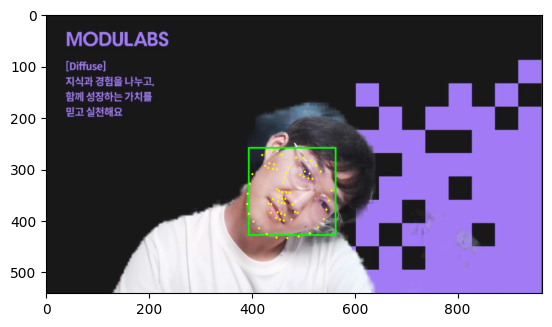

In [39]:
for landmark in list_landmarks: # 얼굴 영역 박스 별 face landmark
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- ;;;;

아무래도 정면 사진들만 학습이 되어있어서 그런 것 같다.  
살짝만 돌아간 사진을 해보자.

### 번외 (3) 반측면에 스티커 적용하기

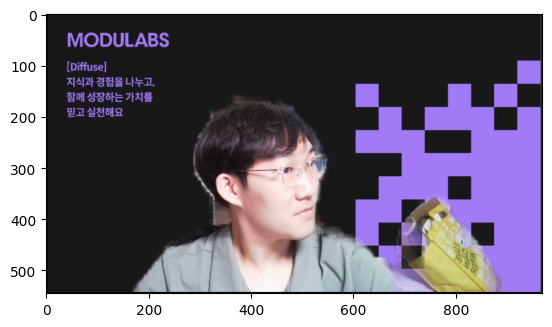

In [40]:
my_image_path = './data/images/my_halfside.png'

img_bgr = cv2.imread(my_image_path, 1)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

In [41]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기

- 이번엔 다시 기본 검출기를 사용해보았다.

In [42]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(407, 242) (593, 428)]]


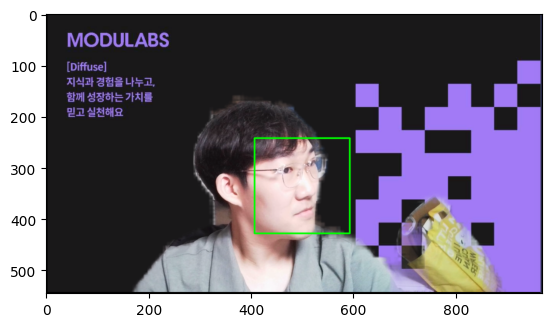

In [43]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    # 왼쪽 위 좌표와 오른쪽 아래 좌표 사이 직각 사각형
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 일단 박스는 나쁘지 않은 것 같다...!

In [44]:
list_landmarks = [] # 랜드마크 위치 list

for dlib_rect in dlib_rects: # 얼굴 영역 박스 별 face landmark
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0])) # list_landmarks의 원소는 1개

68


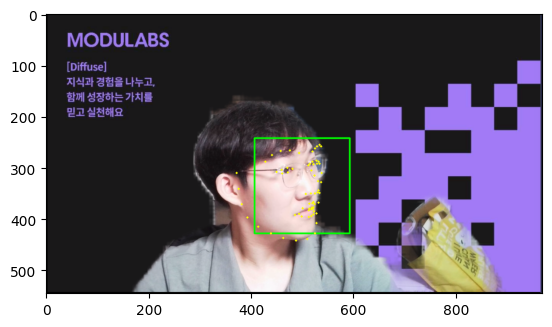

In [45]:
for landmark in list_landmarks: # 얼굴 영역 박스 별 face landmark
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 오! 얼굴을 얼추 잡는 것 같다!

In [46]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = (landmark[30][1] + landmark[51][1]) // 2 # 이미지에서 코 부위의 y값과 코 끝 부위의 y값의 중간값
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(531, 326)
(x,y) : (531,347)
(w,h) : (187,187)


(187, 187, 3)


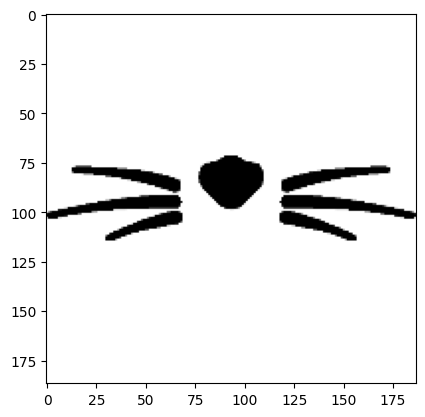

In [47]:
sticker_path = './data/images/cat_whiskers.png' # 스티커 이미지 경로
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정

print (img_sticker.shape)
plt.imshow(img_sticker)

In [48]:
refined_x = x - w // 2
refined_y = y - h // 2
# 이미지 시작점은 top-left 좌표이므로 스티커를 붙이기 위한 x, y 재설정

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (438,254)


In [49]:
# 스티커 이미지가 얼굴 이미지 밖에서 시작하지 않도록 조정이 필요함
# 음수값 만큼 스티커 이미지를 자른다.
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (438,254)


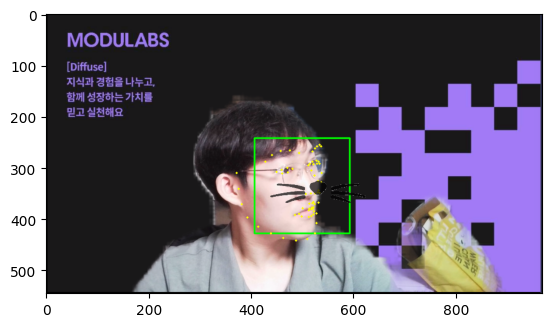

In [50]:
# 스티커의 영역 정하기
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_temp = img_show.copy()

# 스티커 영역 중, 스티커에 해당하지 않는 부분은 얼굴 이미지로, 나머지는 스티커로 설정한다.
img_temp[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,cv2.addWeighted(sticker_area, 0.3, img_sticker, 0.7, 0)).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_temp, cv2.COLOR_BGR2RGB))
plt.show()

- 위치는 맞지만 각도가 맞지 않다. 스티커도 돌려보자

In [51]:
sticker_path = './data/images/cat_whiskers.png' # 스티커 이미지 경로
img_sticker = cv2.imread(sticker_path)
img_sticker = np.where(img_sticker==255, 0, 255).astype(np.uint8)
rows, cols = img_sticker.shape[:2]

In [52]:
# 원근 변환 전 후 4개 좌표
pts1 = np.float32([[0,0], [0,rows], [cols, 0], [cols,rows]])
pts2 = np.float32([[0,0], [0,rows], [cols-50, 150], [cols-50,rows-150]])

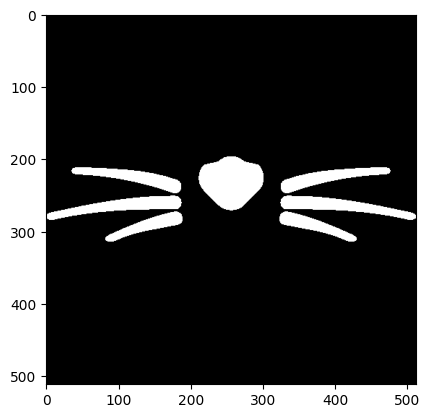

In [53]:
# 변환 전 좌표를 원본 이미지에 표시
plt.imshow(img_sticker)

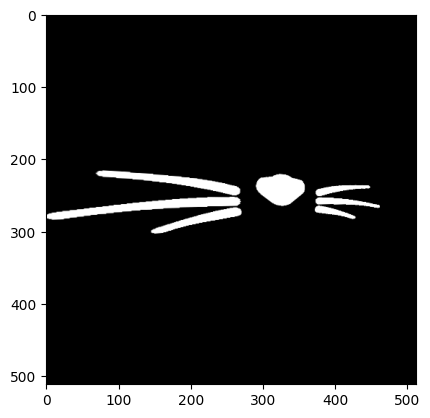

In [54]:
# 원근 변환 행렬 계산
mtrx = cv2.getPerspectiveTransform(pts1, pts2)
# 원근 변환 적용
dst = cv2.warpPerspective(img_sticker, mtrx, (cols, rows))

plt.imshow(dst)

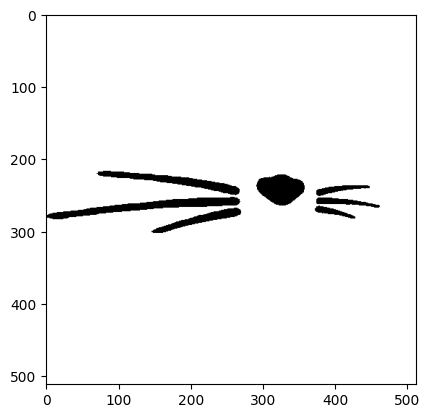

In [55]:
new_dst = np.where(dst==255, 0, 255).astype(np.uint8)
plt.imshow(new_dst)

- TODO

### 번외 (4) 문제점에 대한 고찰

1. 얼굴 각도에 따라 되는 경우가 있고 되지 않는 경우가 있다.
>- hog detector는 선형 분류기이기 때문에 얼굴이 정면이 제대로 잡혀야지만 검출이 가능했다.
>- cnn detector는 딥러닝을 활용한 분류기여서 다른 각도도 검출 가능했지만 랜드마크 검출에서는 형편없었다.  

회전 변환을 이용해서 각도에 따라 검출이 가능하도록 하거나, cnn을 학습할 때 다양한 각도에서 촬영한 사진을 사용하는 것이 좋을 것 같다.

2. 회전의 경우 스티커도 같이 회전해주어야 한다.  

위에서 회전된 스티커를 붙이도록 작성하였지만 완성하지 못했다.  
그리고 현재는 임의로 값을 줄여서 회전변환을 시킨 상태이다.  
이미지에서 랜드마크가 검출된 위치를 잘 활용하여 계산한다면 알맞게 스티커를 회전시켜 붙일 수 있을 것이라 생각한다.